In [11]:
import TZ_utils as util
from TZImgSplit_multi_process import splitbase # 没有感情的天智杯分割器
from TZMerge_multi_process import mergebypoly # 充满感情的融合机器

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pylab # 画图用的
pylab.rcParams['figure.figsize'] = (30.0, 30.0)
!echo 我在想这个地方重复运行就会导致失效？


我在想这个地方重复运行就会导致失效？


In [3]:
# from ImgSplit import splitbase # 正常的分割

data_path = '//data/datasets/DOTA/TZ'

'''
指定分割后数据集的存放位置
'''
split_path = os.path.join(data_path,'split')
split_img_root = os.path.join(split_path,'images')
split_label_root = os.path.join(split_path,'labels')

'''
构造存放路径
'''
if not os.path.exists(split_path):
    os.mkdir(split_path)
print('切分数据地址为：', split_path)
if not os.path.exists(split_img_root):
    os.mkdir(split_img_root)
print('切分后图片地址为：', split_img_root)
if not os.path.exists(split_label_root):
    os.mkdir(split_label_root)
print('切分标注地址为：', split_label_root) 

切分数据地址为： //data/datasets/DOTA/TZ/split
切分后图片地址为： //data/datasets/DOTA/TZ/split/images
切分标注地址为： //data/datasets/DOTA/TZ/split/labels


#  分割

In [4]:
import time
tic = time.time()
split = splitbase(data_path,  # 元数据位置
                 split_path,          # 目标位置
                 choosebestpoint=True,# 选择最佳分割点（？
                 gap=100,             # 步长
                 subsize=1024,        # 切割后图片大小subsize*subsize
                num_process=12)       # 多核
split.splitdata(1)
# split.splitdata(2)
# split.splitdata(0.5)
print('分割耗时', time.time()-tic)
# split.splitdata(1,imgids)
# split.splitdata(2,imgids)

padding: True
分割耗时 13.152567625045776


# 假装前向结束了
## labeltxt生成TASK 1

# 融合

In [9]:
# TODO
print(" Do Inference \n Get Task1 \n Merge Task1 \n Get Outputs with Task1_merged")

 Do Inference 
 Get Task1 
 Merge Task1 
 Get Outputs with Task1_merged


In [ ]:
mergebypoly('//data/datasets/DOTA/DOTAsplit_train/Task1',
           '//data/datasets/DOTA/DOTAsplit_train/merge/Task1')

#到这里再重启一次2333
util.Task2groundtruth_poly('//data/datasets/DOTA/DOTAsplit_train/merge/Task1',
                          '//data/datasets/DOTA/DOTAsplit_train/merge/labelTxt')
print('融合耗时', time.time()-tic)

In [13]:
import os
import numpy as np
from tqdm import tqdm
count = 0
img_paths = os.listdir('//data/datasets/DOTA/TZ/split/images/')
for img_path in tqdm(img_paths):
    test = np.load(os.path.join('//data/datasets/DOTA/TZ/split/images/',img_path))
    if test.shape[0] != 512 or test.shape[1] != 512:
        count += 1
print(count)


100%|██████████| 20362/20362 [00:18<00:00, 1098.47it/s]

0


In [21]:
subsize = 100
w = 90
h = 23
c = 3
orign = np.ones([w,h,c])
print(orign.shape)
orign_pad = np.pad(orign,((0,subsize-w),(0,subsize-h),(0,0))) 
print(orign_pad.shape)
print(orign_pad[91][90][2])

(90, 23, 3)
(100, 100, 3)
0.0


In [25]:
"""
计算数据集的RGB均值
"""
import os
import numpy as np
import cv2
 
ims_path='//data/datasets/DOTA/TZ/split/images/'# 图像数据集的路径
ims_list=os.listdir(ims_path)
R_max
G_max
G_max
R_means=[]
G_means=[]
B_means=[]
R_stds=[]
G_stds=[]
B_stds=[]
for im_list in tqdm(ims_list):
    filepath = ims_path+'/'+im_list
    if os.path.splitext(filepath)[-1] != '.npy':
        continue
    im=np.load(ims_path+'/'+im_list)
#extrect value of diffient channel
    im_R=im[:,:,0]
    im_G=im[:,:,1]
    im_B=im[:,:,2]
#count mean for every channel
    im_R_mean=np.mean(im_R)
    im_R_std = np.std(im_R)
    im_G_mean=np.mean(im_G)
    im_G_std = np.std(im_G)
    im_B_mean=np.mean(im_B)
    im_B_std = np.std(im_B)

#save single mean value to a set of means
    R_means.append(im_R_mean)
    G_means.append(im_G_mean)
    B_means.append(im_B_mean)
    R_stds.append(im_R_std)
    G_stds.append(im_G_std)
    B_stds.append(im_B_std)
    #print('图片：{} 的 RGB平均值为 \n[{}，{}，{}]'.format(im_list,im_R_mean,im_G_mean,im_B_mean) )
#three sets  into a large set
a=[R_means,G_means,B_means]
mean=[0,0,0]
#count the sum of different channel means
mean[0]=np.mean(a[0])
mean[1]=np.mean(a[1])
mean[2]=np.mean(a[2])
std = [0,0,0]
b = [R_stds,G_stds,B_stds]
std[0] = np.mean(b[0])
std[1] = np.mean(b[1])
std[2] = np.mean(b[2])
print('数据集的BGR平均值为\n[{}，{}，{}]'.format( mean[0],mean[1],mean[2]) )
print('数据集的BGR标准差为\n[{}，{}，{}]'.format( std[0],std[1],std[2]) )

100%|██████████| 20362/20362 [03:00<00:00, 112.96it/s]


数据集的BGR平均值为
[77.30855971916101，81.86460024724364，80.64689623847035]
数据集的BGR标准差为
[24.91793981872366，25.721198295774503，26.80548953080183]


# 可视化

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from TZ import DOTA
import pylab
pylab.rcParams['figure.figsize'] = (25.0, 25.0)
import TZ_utils as util
from TZImgSplit_multi_process import splitbase # 没有感情的天智杯分割器
from TZMerge_multi_process import mergebypoly # 充满感情的融合机器

In [2]:
data_path = '//data/datasets/DOTA/TZ'

'''
指定分割后数据集的存放位置
'''
split_path = os.path.join(data_path,'split')
split_img_root = os.path.join(split_path,'images')
split_label_root = os.path.join(split_path,'labels')

'''
构造存放路径
'''
if not os.path.exists(split_path):
    os.mkdir(split_path)
print('切分数据地址为：', split_path)
if not os.path.exists(split_img_root):
    os.mkdir(split_img_root)
print('切分后图片地址为：', split_img_root)
if not os.path.exists(split_label_root):
    os.mkdir(split_label_root)
print('切分标注地址为：', split_label_root) 

import time
tic = time.time()
split = splitbase(data_path,  # 元数据位置
                 split_path,          # 目标位置
                 choosebestpoint=True,# 选择最佳分割点（？
                 gap=100,             # 步长
                 subsize=1024,        # 切割后图片大小subsize*subsize
                num_process=12)       # 多核
split.splitdata(1)
# split.splitdata(2)
# split.splitdata(0.5)
print('分割耗时', time.time()-tic)
# split.splitdata(1,imgids)
# split.splitdata(2,imgids)

'''
之前已经有了split_path, split_img_root,split_label_root
'''

dataset = DOTA(split_path, confidence = False )

切分数据地址为： //data/datasets/DOTA/TZ/split
切分后图片地址为： //data/datasets/DOTA/TZ/split/images
切分标注地址为： //data/datasets/DOTA/TZ/split/labels
padding: True
分割耗时 14.744023323059082


In [3]:
imgids = dataset.getImgIds(catNms=['ship', 'storage-tank'])
print('符合条件的图片共'+ str(len(imgids)) + '个!')
imgid = imgids[0]
img = dataset.loadImgs(imgid)[0]
# imgs = dataset.loadImgs(imgids)

符合条件的图片共35个!
isarralike: False
imgids: ['train_2733__1__924___0']
filename: //data/datasets/DOTA/TZ/split/images/train_2733__1__924___0.npy


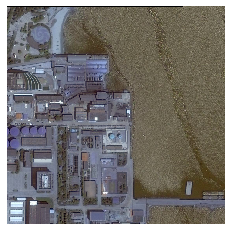

In [4]:
plt.axis('off')
plt.imshow(img)
plt.show()

{'name': 'storage-tank', 'poly': [(382.0, 645.0), (407.0, 645.0), (407.0, 670.0), (382.0, 670.0)], 'area': 625.0}
isarralike: False
imgids: ['train_2733__1__924___0']
filename: //data/datasets/DOTA/TZ/split/images/train_2733__1__924___0.npy


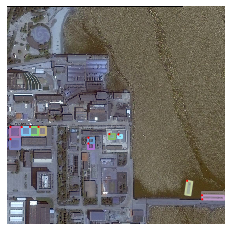

In [5]:
anns = dataset.loadAnns(imgId=imgid)
print(anns[0])
dataset.showAnns(anns, imgid, 2)

In [6]:
# from ImgSplit import splitbase # 正常的分割



merge_path = os.path.join(split_path,'merge')
split_Task1_root = os.path.join(split_path,'Task1')
merge_Task1_root = os.path.join(merge_path,'Task1')
merge_label_root = os.path.join(merge_path,'labels')

'''
构造存放路径
'''
if not os.path.exists(merge_path):
    os.mkdir(merge_path)
print('融合数据地址：', merge_path)
if not os.path.exists(split_Task1_root):
    os.mkdir(split_Task1_root)
print('分割数据按类汇总的地址：', split_Task1_root)
if not os.path.exists(merge_Task1_root):
    os.mkdir(merge_Task1_root)
print('融合数据按类汇总的地址：', merge_Task1_root)
if not os.path.exists(merge_label_root):
    os.mkdir(merge_label_root)
print('融合数据标注的地址：', merge_label_root)


融合数据地址： //data/datasets/DOTA/TZ/split/merge
分割数据按类汇总的地址： //data/datasets/DOTA/TZ/split/Task1
融合数据按类汇总的地址： //data/datasets/DOTA/TZ/split/merge/Task1
融合数据标注的地址： //data/datasets/DOTA/TZ/split/merge/labels


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from TZMerge_multi_process import mergebypoly # 充满感情的融合机器
tic = time.time()


# 重启后直接运行下列代码……
util.groundtruth2Task1(split_label_root,
                       split_Task1_root)
mergebypoly(split_Task1_root,
           merge_Task1_root)

#到这里再重启一次2333
util.Task2groundtruth_poly(merge_Task1_root,
                          merge_label_root)
print('融合耗时', time.time()-tic)

融合耗时 4.960631847381592


In [8]:
'''
测试一下融合后的结果
'''
imgids = util.GetFileFromThisRootDir(merge_label_root)
imgids = [util.custombasename(x) for x in imgids]
print(len(imgids),type(imgids[0]))
imgids = list(set(imgids)) # 对于imgdis进行去重
print(len(imgids),type(imgids[0]))
print(imgids[0])

'''
建立融合软连接
已经有了merge_path和里面的labelTxt(merge_label_root)，但还没有img
'''
merge_img_root = os.path.join(merge_path,'images')
if not os.path.exists(merge_img_root):
    os.symlink(data_path +'/images', merge_img_root)

'''
merge后dota实例化
'''
DotaMerge = DOTA(merge_path,confidence = True)

456 <class 'str'>
456 <class 'str'>
train_2230


加载第 233 张图片: train_0814
13
isarralike: False
imgids: ['train_0814']
filename: //data/datasets/DOTA/TZ/split/merge/images/train_0814.npy
filename: //data/datasets/DOTA/TZ/split/merge/images/train_0814.tiff


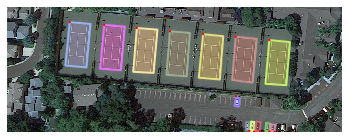

In [10]:
type(DotaMerge)
ID = 233
imgId = imgids[ID]
print('加载第', ID ,'张图片:',imgId )


anns = DotaMerge.loadAnns(imgId=imgId)
print(len(anns))
DotaMerge.showAnns(anns, imgId,2)
